In [26]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit



In [27]:
df = pd.read_csv('data_csv.csv', index_col='loan_applicant_id')
df.head()
df = df.dropna()

In [28]:
x = df['household_income'].values
y = df['y'].values
print(x,y, sep="\n")
print(type(x), type(y), sep="\n")

[192  57 212 ... 264  56 240]
[1 0 0 ... 1 0 0]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [29]:
import matplotlib.pyplot as plt

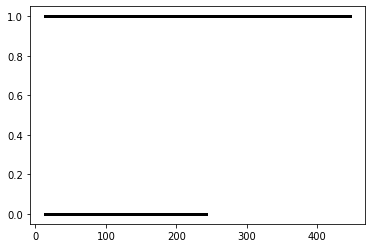

In [30]:
plt.scatter(x, y, color="black", marker = "X", s=3)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

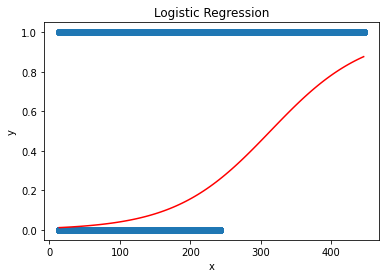

In [84]:
logreg = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
logreg.fit(x_train, y_train)
predictions = logreg.predict(x_test)


# # Visualising the Training set results
plt.scatter(x_test, y_test)

# create a line plot of the logistic regression model
X = np.linspace(x_test.min(), x_test.max(), 100)
Y = logreg.predict_proba(X.reshape(-1,1))[:,1]
plt.plot(X, Y, color='red')

# show the scatter plot and line plot on the same graph
plt.xlabel('x')
plt.ylabel('y')
plt.title('Logistic Regression')
plt.show()

In [33]:


import seaborn as sns

<AxesSubplot:>

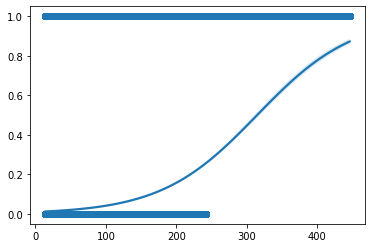

In [34]:
sns.regplot(x=x, y=y, data=df, logistic=True)

# Try do manually

In [72]:
from scipy.stats import norm
import math
def f(x,b,mu,sigma):
    # def f(x,a,b): 
    # Not factoring in T since we don't know the time period
    # th1 = np.log(b,where=b>0)
    th2 = np.log(x,where=x>0)
    # th1[b<=0] = 0
    # th2[x<=0] = 0
    # t1 = th1 - th2
    # print(b,x)
    # t1 = b/x if b>0 and x>0 else [0 for i in range(len(x))]
    t1 = [math.log1p(b/i) if i>0 else 0 for i in b/x]
    # print(t1)
    # t1 = np.log(b, where=b>0) - np.log(x, where=x>0)
    # # print(t1, b, x)
    # # print(t1.shape, b.shape, x.shape)
    # # t1 = math.log(b) - math.log(x)
    t2 = (mu -(sigma**2)/2)
    t3 = (t1 - t2)/sigma
    # print(t3)
    result = norm.cdf(t3)
    # print(result)
    # result = [i[0] for i in result]
    # result = np.array(result)
    #print(type(result), result) #, result)


    # result = a*x +b
    # result = [i[0] for i in result]
    return result

In [73]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(f, x_train.astype(float), y_train.astype(float),maxfev=1000000)

c:\Users\tanya\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [74]:
popt

array([1.75449238e+02, 5.49451392e+00, 7.64730042e-04])

In [75]:
pcov

array([[inf, inf, inf],
       [inf, inf, inf],
       [inf, inf, inf]])

In [78]:
print(min(x_test), max(x_test))

[14] [446]


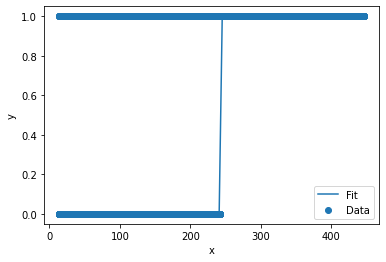

In [79]:
# generate some sample data
# X = 
# ydata = func(X, 2.5, 1.3, 0.5) + 0.2 * np.random.normal(size=len(xdata))

# perform the curve fit
# popt, pcov = curve_fit(func, xdata, ydata)

# plot the original data
plt.scatter(x_test, y_test, label='Data')

# plot the fitted curve
xfit = np.linspace(x_test.min(), x_test.max(), 100)
yfit = f(xfit, *popt)
plt.plot(xfit, yfit, label='Fit')

# add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# show the plot
plt.show()

In [83]:
# Comparision of mean squared error for both models
# Our model
from sklearn.metrics import mean_squared_error
predictions = f(x_test, *popt)
print(mean_squared_error(y_test, predictions))

# Log model
predictions = logreg.predict(x_test)
print(mean_squared_error(y_test, predictions))



0.061374969329892004
0.08080023307759542
